<a href="https://colab.research.google.com/github/Clinda02/customer_analysis/blob/main/1_vip_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vip 고객 식별하기

* **고객 관계 강화** : 구매 금액 증가 고객에게는 감사 메세지 발송 및 추가혜택이나 맞춤형 제안을 제공해 관계 강화.
* **이탈 위험 고객 파악 및 유지 전략 수립** : 구매 금액 감소 고객에게는 이탈 방지를 위한 전략을 수립 이들의 피드백을 요청하고, 만족도를 향상할 방안 모색.
* **마케팅 전략 재검토** : 고객별 구매 금액 변화를 기반으로 현재 마케팅 전략의 효과 분석 및 전략 조정. ex) 특정 제품/서비스에 대한 마케팅 강화 및 새로운 프로모션 기획.
* **제품 개선 및 혁신** : 고객의 구매 패턴 변화는 제품이나 서비스 개선의 기회를 제공. 고객의 니즈를 충족시키기 위한 제품 개선이나 신제품 개발 고려.
<br>
### vip 고객 분석

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Mysql 데이터베이스 연결
conn = mysql.connector.connect(
  host = 'localhost',
  user='root',
  password = 'password',
  database = 'classicmodels'
)

# VIP 고객 식별 쿼리
vip_customers_query = """
SELECT o.customerNumber, count(Distinct orderNumber) as order_count, sum(p.amount) as total_spent
FROM orders o
JOIN payments p on o.customerNumber = p.customerNumber
GROUP BY o.customerNumber
ORDER BY total_spent DESC
LIMIT 10;
"""

vip_df = pd.read_sql_query(vip_customers_query, conn)
vip_df

C:\Users\user\AppData\Local\Temp\ipykernel_10644\2277725342.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vip_df = pd.read_sql_query(vip_customers_query, conn)


,customerNumber,order_count,total_spent
0,141,26,18609213.48
1,124,17,9931200.08
2,114,5,902925.35
3,148,5,781255.15
4,323,5,773110.40
5,151,4,711655.80
6,353,5,634915.95
7,276,4,548136.88
8,145,5,537232.50
9,321,4,529363.12


### VIP 고객 시각화

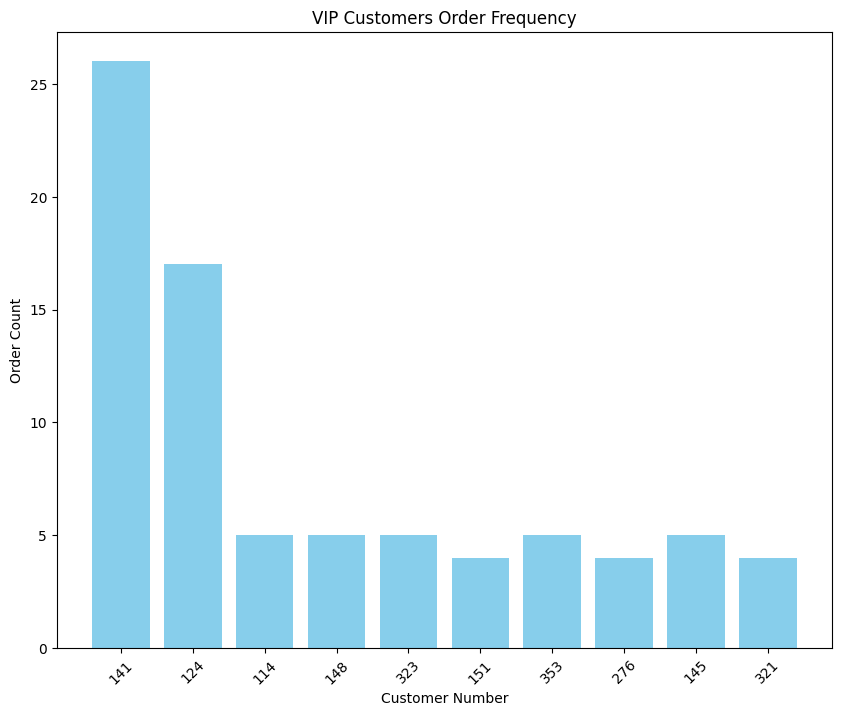

In [ ]:
# 구매 빈도 시각화
plt.figure(figsize=(10,8))
plt.bar(vip_df['customerNumber'].astype(str), vip_df['order_count'], color= 'skyblue')
# plt.bar(vip_df['customerNumber'], vip_df['order_count']) # 문자열 변환 X하면 숫자형으로 인식.
plt.xlabel('Customer Number')
plt.ylabel('Order Count')
plt.title('VIP Customers Order Frequency')
plt.xticks(rotation=45)
plt.show()

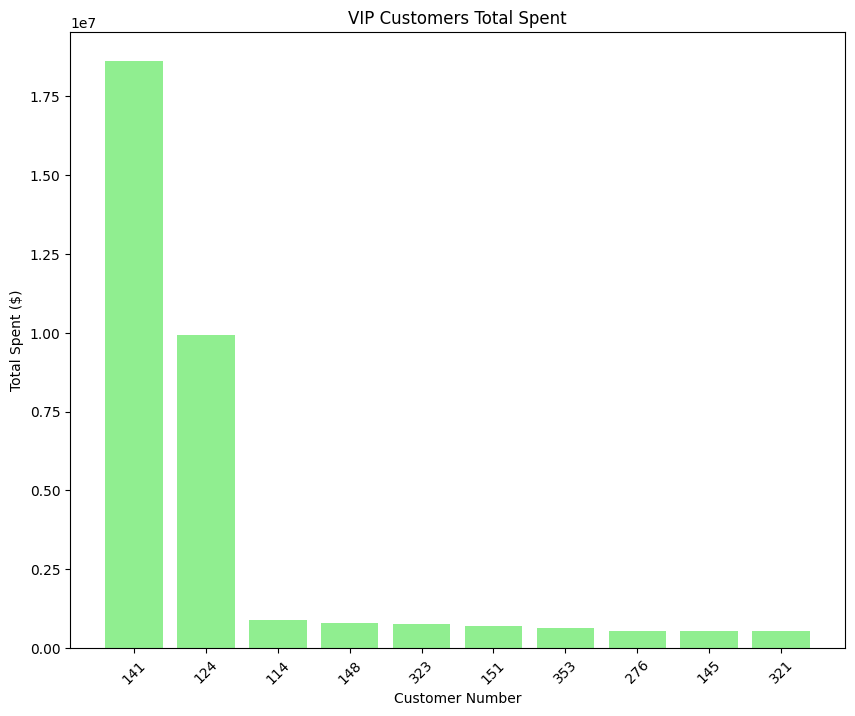

In [ ]:
# 구매 금액 시각화
plt.figure(figsize=(10,8))
plt.bar(vip_df['customerNumber'].astype(str), vip_df['total_spent'], color= 'lightgreen')
# plt.bar(vip_df['customerNumber'], vip_df['order_count']) # 문자열 변환 X하면 숫자형으로 인식.
plt.xlabel('Customer Number')
plt.ylabel('Total Spent ($)')
plt.title('VIP Customers Total Spent')
plt.xticks(rotation=45)
plt.show()

### 연간 구매금액의 변화 추이
- 2004년도와 2005년도 연간 구매 금액의 변화 추이를 확인하여 vip 고객 분석
- 구매금액이 크게 감소 및 증가한 vip 고객을 파악

In [ ]:
# 시간대별 구매 금액 변화 분석 쿼리 실행
purchase_change_query = """
SELECT
    p.customerNumber,
    SUM(CASE
        WHEN p.paymentDate BETWEEN '2004-01-01' AND '2004-12-30' THEN p.amount
        ELSE 0
    END) AS previous_period_total,
    SUM(CASE
        WHEN p.paymentDate BETWEEN '2004-12-30' AND '2005-12-31' THEN p.amount
        ELSE 0
    END) AS recent_period_total
FROM
    payments p
INNER JOIN (
    SELECT customerNumber
    FROM payments
    GROUP BY customerNumber
    ORDER BY SUM(amount) DESC

) AS vip_customers ON p.customerNumber = vip_customers.customerNumber
GROUP BY
    p.customerNumber;
"""

# SQL 쿼리 실행 및 결과 DataFrame으로 변환
purchase_change_df = pd.read_sql_query(purchase_change_query, conn)
purchase_change_df

C:\Users\user\AppData\Local\Temp\ipykernel_10644\1483755752.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  purchase_change_df = pd.read_sql_query(purchase_change_query, conn)


,customerNumber,previous_period_total,recent_period_total
0,141,177557.11,348341.72
1,124,231562.53,184842.63
2,114,127155.96,0.00
3,151,60279.07,0.00
4,148,2611.84,3516.04
...,...,...,...
93,381,12081.52,14379.90
94,473,7612.06,0.00
95,103,7742.92,0.00
96,198,15517.30,0.00


In [ ]:
# 구매 금액 변화 계산
purchase_change_df['change_in_spending'] = purchase_change_df.recent_period_total - purchase_change_df.previous_period_total
purchase_change_df

,customerNumber,previous_period_total,recent_period_total,change_in_spending
0,141,177557.11,348341.72,170784.61
1,124,231562.53,184842.63,-46719.90
2,114,127155.96,0.00,-127155.96
3,151,60279.07,0.00,-60279.07
4,148,2611.84,3516.04,904.20
...,...,...,...,...
93,381,12081.52,14379.90,2298.38
94,473,7612.06,0.00,-7612.06
95,103,7742.92,0.00,-7742.92
96,198,15517.30,0.00,-15517.30


In [ ]:
# 변화량의 절대값에 따라 상위 10개 고객 선택
top_10_customers_change = purchase_change_df.assign(
  abs_change_in_spending = purchase_change_df['change_in_spending'].abs()
).nlargest(10, 'abs_change_in_spending')

top_10_customers_change

,customerNumber,previous_period_total,recent_period_total,change_in_spending,abs_change_in_spending
0,141,177557.11,348341.72,170784.61,170784.61
2,114,127155.96,0.00,-127155.96,127155.96
16,298,108777.92,0.00,-108777.92,108777.92
20,166,105420.57,0.00,-105420.57,105420.57
6,187,99984.40,0.00,-99984.40,99984.40
25,157,98509.25,0.00,-98509.25,98509.25
11,353,0.00,96362.46,96362.46,96362.46
9,146,90593.25,0.00,-90593.25,90593.25
32,286,90545.37,0.00,-90545.37,90545.37
17,131,85347.32,0.00,-85347.32,85347.32


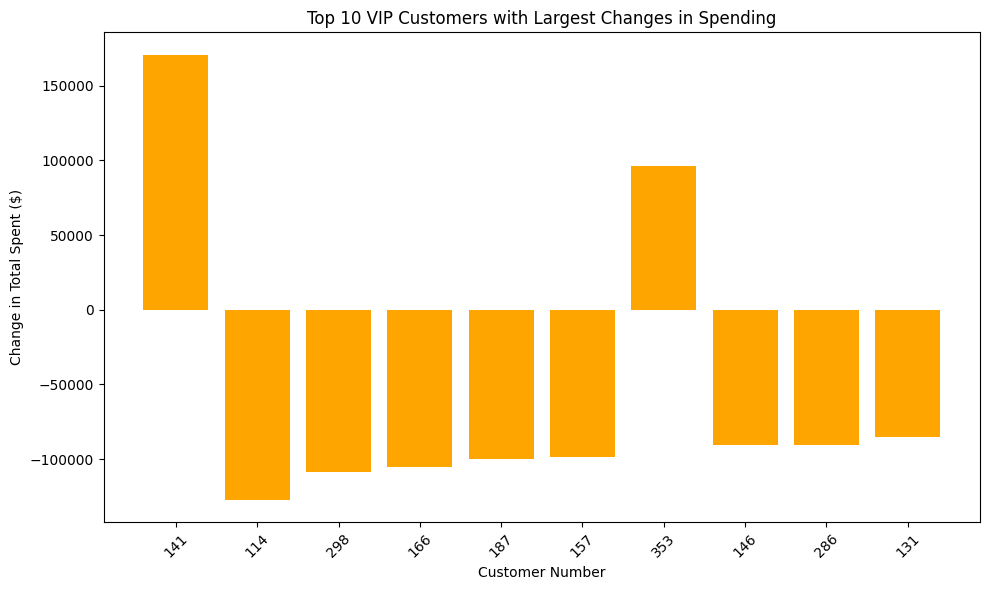

In [ ]:
# 상위 10개 고객의 원래 변화량 시각화
plt.figure(figsize=(10, 6))

# 여기서는 .loc을 사용해 원래 DataFrame에서 상위 10명 고객의 데이터를 가져옵니다.
plt.bar(top_10_customers_change['customerNumber'].astype(str),
    purchase_change_df.loc[top_10_customers_change.index, 'change_in_spending'], # 원본 데이터와 관계 유지
    color='orange'
)
plt.xlabel('Customer Number')
plt.ylabel('Change in Total Spent ($)')
plt.title('Top 10 VIP Customers with Largest Changes in Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 구매 금액 변화량이 증가한 상위 10명의 고객을 찾습니다.
increased_spending_top10 = purchase_change_df[purchase_change_df['change_in_spending'] > 0] \
                                .nlargest(10, 'change_in_spending')

# 구매 금액 변화량이 감소한 상위 10명의 고객을 찾습니다.
decreased_spending_top10 = purchase_change_df[purchase_change_df['change_in_spending'] < 0] \
                                .nsmallest(10, 'change_in_spending') \
                                .sort_values(by='change_in_spending', ascending=True)  # 감소한 금액이 큰 순서대로 정렬



,customerNumber,previous_period_total,recent_period_total,change_in_spending
0,141,177557.11,348341.72,170784.61
11,353,0.00,96362.46,96362.46
14,496,0.00,82419.75,82419.75
7,276,0.00,56932.30,56932.30
8,321,0.00,46781.66,46781.66
30,205,0.00,39580.60,39580.60
27,311,16212.59,46770.52,30557.93
75,333,0.00,21432.31,21432.31
60,250,26311.63,44239.72,17928.09
23,334,28394.54,45785.34,17390.80


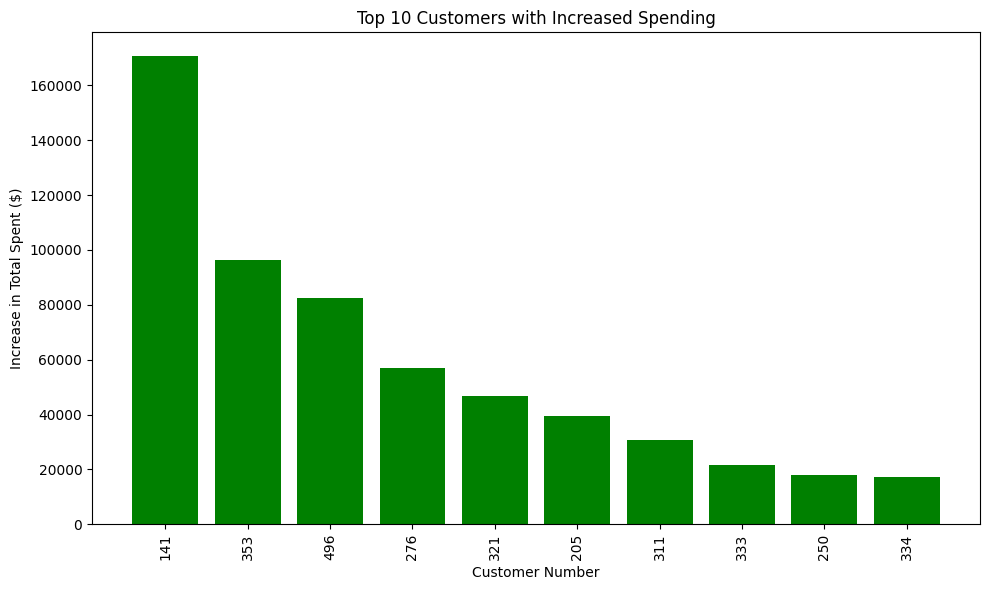

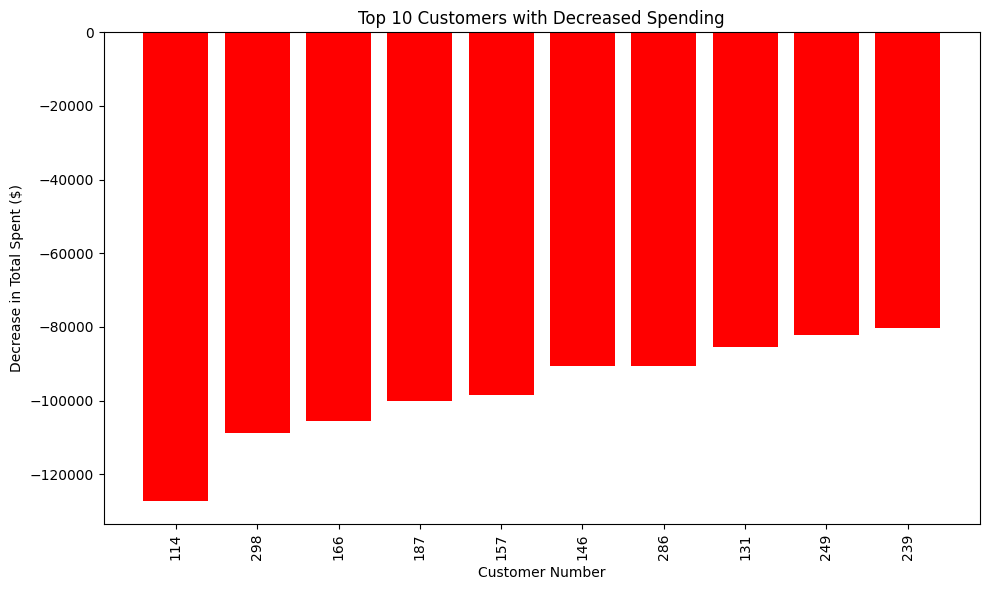

In [ ]:
# 증가한 고객의 변화량 시각화
plt.figure(figsize=(10, 6))
plt.bar(increased_spending_top10['customerNumber'].astype(str), increased_spending_top10['change_in_spending'], color='green')
plt.xlabel('Customer Number')
plt.ylabel('Increase in Total Spent ($)')
plt.title('Top 10 Customers with Increased Spending')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# plt.xticks(rotation=90);plt.tight_layout();plt.show() # 1줄에 여러 코드 작성 시 ; 사용

# 감소한 고객의 변화량 시각화
plt.figure(figsize=(10, 6))
plt.bar(decreased_spending_top10['customerNumber'].astype(str), decreased_spending_top10['change_in_spending'], color='red')
plt.xlabel('Customer Number')
plt.ylabel('Decrease in Total Spent ($)')
plt.title('Top 10 Customers with Decreased Spending')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()